<a href="https://colab.research.google.com/github/EmanuelLiracc/Artificial-Intelligence/blob/main/PIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PIA - Machine Learning Model**

For the machine learning model, we will use a COVID-19 radiography dataset from the platform kaggle, the following lines represent the import of the dataset from the source.

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database
!unzip covid19-radiography-database.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-79

**Import Libraries**

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from random import randint
from PIL import Image, ImageOps
import cv2
import os
import glob
import numpy as np
import pprint
import pandas as pd

In [ ]:
# Document Paths

path = "../content/COVID-19_Radiography_Dataset"
data_dir = os.path.join(path)

class_folders = [
    "/content/COVID-19_Radiography_Dataset/COVID",
    "/content/COVID-19_Radiography_Dataset/Lung_Opacity",
    "/content/COVID-19_Radiography_Dataset/Normal",
    "/content/COVID-19_Radiography_Dataset/Viral_Pneumonia"
]

In [ ]:
num_sample_images = 1
image_dict = {}

for i, folder in enumerate(class_folders):
    class_label = folder.split("/")[-1].split()[0]
    images_folders = folder + "/masks"  # Path to the 'images' folder within the class folder
    image_folder = glob.glob(images_folders + "/*.png")[:num_sample_images]

    image_dict[class_label] = image_folder

print(image_dict)

{'COVID': ['/content/COVID-19_Radiography_Dataset/COVID/masks/COVID-2785.png'], 'Lung_Opacity': ['/content/COVID-19_Radiography_Dataset/Lung_Opacity/masks/Lung_Opacity-3215.png'], 'Normal': ['/content/COVID-19_Radiography_Dataset/Normal/masks/Normal-7704.png'], 'Viral_Pneumonia': []}


In [ ]:
# Label tagging

levels = ['Normal', 'COVID', 'Lung_Opacity', 'Viral Pneumonia']
data = []
for id, level in enumerate(levels):
    for file in os.listdir(os.path.join(data_dir, level + '/masks')):
        data.append(['{}/masks/{}'.format(level, file), level])

data = pd.DataFrame(data, columns = ['image_file', 'result'])

data['path'] = path + '/' + data['image_file']

data.head()

print(data)

                                           image_file           result  \
0                        Normal/masks/Normal-7704.png           Normal   
1                         Normal/masks/Normal-276.png           Normal   
2                        Normal/masks/Normal-9791.png           Normal   
3                        Normal/masks/Normal-5851.png           Normal   
4                        Normal/masks/Normal-8717.png           Normal   
...                                               ...              ...   
21160  Viral Pneumonia/masks/Viral Pneumonia-1345.png  Viral Pneumonia   
21161   Viral Pneumonia/masks/Viral Pneumonia-413.png  Viral Pneumonia   
21162   Viral Pneumonia/masks/Viral Pneumonia-598.png  Viral Pneumonia   
21163   Viral Pneumonia/masks/Viral Pneumonia-420.png  Viral Pneumonia   
21164   Viral Pneumonia/masks/Viral Pneumonia-976.png  Viral Pneumonia   

                                                    path  
0      ../content/COVID-19_Radiography_Dataset/Norma

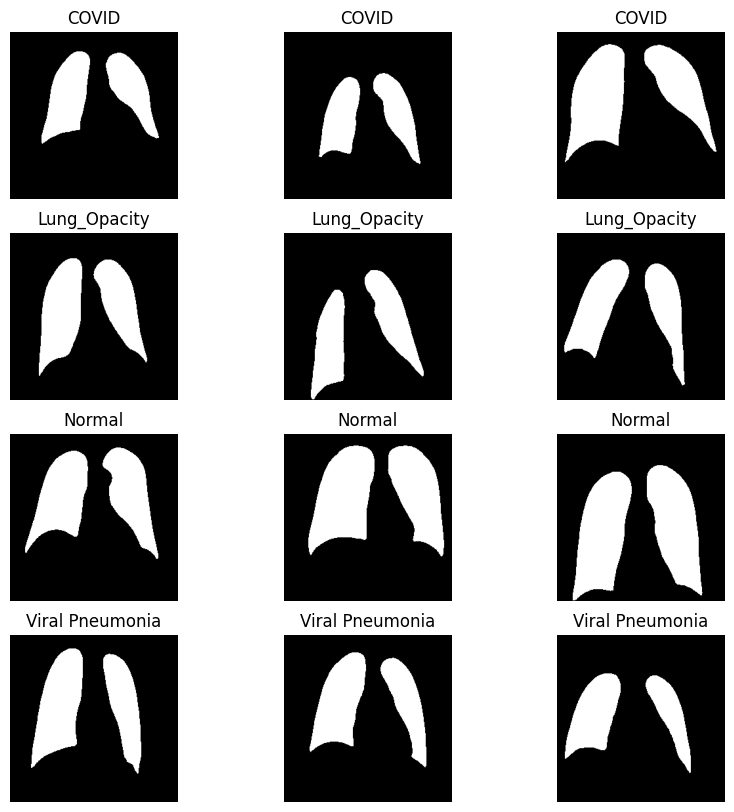

In [ ]:
#Data Visualization

samples = 3

fig, m_axs = plt.subplots(4, samples, figsize = (10, 10))

for n_axs, (type_name, type_rows) in zip(m_axs, data.sort_values(['result']).groupby('result')):
    n_axs[0].set_title(type_name, fontsize = 12), n_axs[1].set_title(type_name, fontsize = 12),
    n_axs[0].set_title(type_name, fontsize = 12), n_axs[2].set_title(type_name, fontsize = 12),
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(samples, random_state = 1000).iterrows()):
        picture = c_row['path']
        image = cv2.imread(picture)
        c_ax.imshow(image)
        c_ax.axis('off')

In [ ]:
pixel_img = []

for image in tqdm(data['path']):
    img=Image.open(image)
    img=ImageOps.grayscale(img)
    img=img.resize((64,64))
    img=np.asarray(img)
    img=img.reshape((64,64,1))
    pixel_img.append(img)

NameError: name 'tqdm' is not defined